In [1]:
from pandas import read_excel
from pandas import datetime
from matplotlib import pyplot

<ipython-input-1-537e00643d6d>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
airlines = read_excel('E:/DataScience/Assignments/Forecasting/AirlinesData.xlsx', header=0, index_col=0, parse_dates=True,squeeze=True)

In [3]:
airlines

Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [4]:
upsampled = airlines.resample('D').mean()
print(upsampled.head(32))

Month
1995-01-01    112.0
1995-01-02      NaN
1995-01-03      NaN
1995-01-04      NaN
1995-01-05      NaN
1995-01-06      NaN
1995-01-07      NaN
1995-01-08      NaN
1995-01-09      NaN
1995-01-10      NaN
1995-01-11      NaN
1995-01-12      NaN
1995-01-13      NaN
1995-01-14      NaN
1995-01-15      NaN
1995-01-16      NaN
1995-01-17      NaN
1995-01-18      NaN
1995-01-19      NaN
1995-01-20      NaN
1995-01-21      NaN
1995-01-22      NaN
1995-01-23      NaN
1995-01-24      NaN
1995-01-25      NaN
1995-01-26      NaN
1995-01-27      NaN
1995-01-28      NaN
1995-01-29      NaN
1995-01-30      NaN
1995-01-31      NaN
1995-02-01    118.0
Freq: D, Name: Passengers, dtype: float64


In [5]:
upsampled.isna().sum()

2796

Month
1995-01-01    112.000000
1995-01-02    112.193548
1995-01-03    112.387097
1995-01-04    112.580645
1995-01-05    112.774194
1995-01-06    112.967742
1995-01-07    113.161290
1995-01-08    113.354839
1995-01-09    113.548387
1995-01-10    113.741935
1995-01-11    113.935484
1995-01-12    114.129032
1995-01-13    114.322581
1995-01-14    114.516129
1995-01-15    114.709677
1995-01-16    114.903226
1995-01-17    115.096774
1995-01-18    115.290323
1995-01-19    115.483871
1995-01-20    115.677419
1995-01-21    115.870968
1995-01-22    116.064516
1995-01-23    116.258065
1995-01-24    116.451613
1995-01-25    116.645161
1995-01-26    116.838710
1995-01-27    117.032258
1995-01-28    117.225806
1995-01-29    117.419355
1995-01-30    117.612903
1995-01-31    117.806452
1995-02-01    118.000000
Freq: D, Name: Passengers, dtype: float64


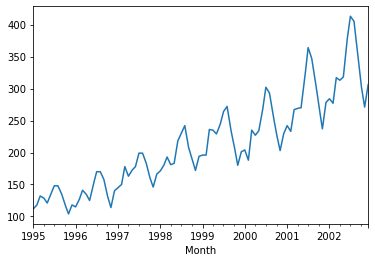

In [6]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

In [7]:
resample = airlines.resample('Y')
yearly_mean_sales = resample.mean()

In [8]:
yearly_mean_sales

Month
1995-12-31    126.666667
1996-12-31    139.666667
1997-12-31    170.166667
1998-12-31    197.000000
1999-12-31    225.000000
2000-12-31    238.916667
2001-12-31    284.000000
2002-12-31    328.250000
Freq: A-DEC, Name: Passengers, dtype: float64

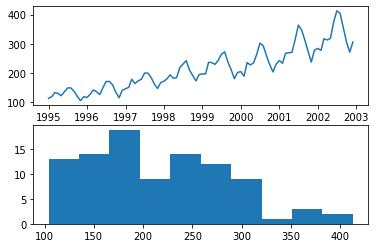

In [9]:
pyplot.subplot(211)
pyplot.plot(airlines)

pyplot.subplot(212)
pyplot.hist(airlines)
pyplot.show()

In [10]:
from pandas import DataFrame
from numpy import sqrt
from numpy import log
dataframe = DataFrame(airlines.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = sqrt(dataframe['Passengers'])

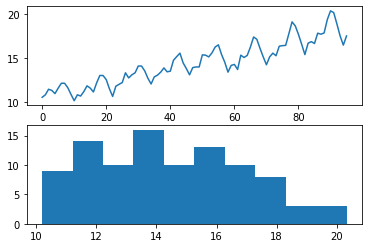

In [11]:
pyplot.subplot(211)
pyplot.plot(dataframe['Passengers'])

pyplot.subplot(212)
pyplot.hist(dataframe['Passengers'])
pyplot.show()

In [12]:
dataframe = DataFrame(airlines.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = log(dataframe['Passengers'])

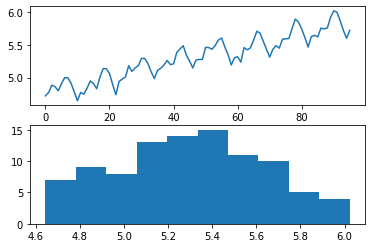

In [13]:
pyplot.subplot(211)
pyplot.plot(dataframe['Passengers'])

pyplot.subplot(212)
pyplot.hist(dataframe['Passengers'])
pyplot.show()

Month
1995-12-31    126.666667
1996-12-31    139.666667
1997-12-31    170.166667
1998-12-31    197.000000
1999-12-31    225.000000
Freq: A-DEC, Name: Passengers, dtype: float64


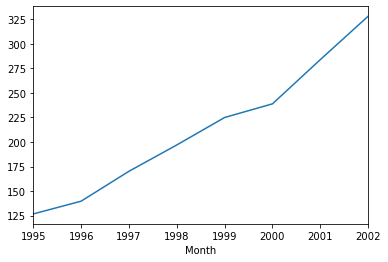

In [14]:
print(yearly_mean_sales.head())
yearly_mean_sales.plot()
pyplot.show()